In [23]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import plotly.express as px
from wordcloud import *
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

path = '/Users/laurentfintoni/Desktop/University/COURSE DOCS/YEAR 2/EPUB/PROJECT/EPDS/'

rhz_artworks = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra.pkl')
rhz_artists = pd.read_pickle(path+'Rhizome_data/rhizome_artists_extra.pkl')
moma_artists = pd.read_pickle(path+'MOMA_data/pickle/MoMAartists.pkl')
moma_artworks_old = pd.read_pickle(path+'MOMA_data/pickle/old_artworks.pkl')
moma_artworks_new = pd.read_pickle(path+'MOMA_data/pickle/new_artworks.pkl')

In [ ]:
moma_artists

In [ ]:
#create a dataframe of cat variable (gender) over time (date acquired, numerical)

rhizome_male_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'M']
rhizome_male_artworks = rhizome_male_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
rhizome_female_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'F']
rhizome_female_artworks = rhizome_female_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
rhizome_gender_artworks = pd.merge(rhizome_male_artworks, rhizome_female_artworks, left_on='Date Acquired', right_on='Date Acquired')
rhizome_gender_artworks = rhizome_gender_artworks.sort_values(by='Date Acquired')
rhizome_gender_artworks = rhizome_gender_artworks.reset_index(drop=True)
rhizome_gender_artworks = rhizome_gender_artworks.drop(index=0, axis=0)
rhizome_gender_artworks

In [ ]:
moma_old_artworks_male = moma_artworks_old.loc[moma_artworks_old['Gender'] == 'M']
moma_old_artworks_male.loc[:,'DateAcquired'] = moma_old_artworks_male['DateAcquired'].where((moma_old_artworks_male['DateAcquired'].str.len() <= 4), moma_old_artworks_male['DateAcquired'].str[0:4])
moma_old_artworks_male = moma_old_artworks_male['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
moma_old_artworks_female = moma_artworks_old.loc[moma_artworks_old['Gender'] == 'F']
moma_old_artworks_female.loc[:,'DateAcquired'] = moma_old_artworks_female['DateAcquired'].where((moma_old_artworks_female['DateAcquired'].str.len() <= 4), moma_old_artworks_female['DateAcquired'].str[0:4])
moma_old_artworks_female = moma_old_artworks_female['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
moma_old_gender_artworks = pd.merge(moma_old_artworks_male, moma_old_artworks_female, left_on='Date Acquired', right_on='Date Acquired')
moma_old_gender_artworks = moma_old_gender_artworks.sort_values(by='Date Acquired')
moma_old_gender_artworks = moma_old_gender_artworks.reset_index(drop=True)
moma_old_gender_artworks = moma_old_gender_artworks.drop(index=0, axis=0)
moma_old_gender_artworks

In [ ]:
moma_new_artworks_male = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'M']
moma_new_artworks_male.loc[:,'DateAcquired'] = moma_new_artworks_male['DateAcquired'].where((moma_new_artworks_male['DateAcquired'].str.len() <= 4), moma_new_artworks_male['DateAcquired'].str[0:4])
moma_new_artworks_male = moma_new_artworks_male['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
moma_new_artworks_female = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'F']
moma_new_artworks_female.loc[:,'DateAcquired'] = moma_new_artworks_female['DateAcquired'].where((moma_new_artworks_female['DateAcquired'].str.len() <= 4), moma_new_artworks_female['DateAcquired'].str[0:4])
moma_new_artworks_female = moma_new_artworks_female['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
moma_new_gender_artworks = pd.merge(moma_new_artworks_male, moma_new_artworks_female, left_on='Date Acquired', right_on='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.sort_values(by='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.reset_index(drop=True)
moma_new_gender_artworks = moma_new_gender_artworks.drop(index=0, axis=0)
moma_new_gender_artworks

In [ ]:
#dual line plot w/ cat variable over time (gender, date acquired), one database 

plots = dict(date=moma_new_gender_artworks['Date Acquired'][20:40], artists=moma_new_gender_artworks['Male Artists'][20:40], artists_2=moma_new_gender_artworks['Female Artists'][20:40])
data = pd.DataFrame(plots)
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.lineplot(x='date', y='artists', data=data, label='Male Artists')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1 = sns.lineplot(x='date', y='artists_2', data=data, label='Female Artists')

In [ ]:
#FEMALE ARTISTS ACQUISITION comparison across datasets, over time (date acquired)

moma_new_gender_artworks_2 = moma_new_gender_artworks.drop('Male Artists', axis=1)
moma_new_gender_artworks_2 = moma_new_gender_artworks_2[20:40]
rhizome_gender_artworks_2 = rhizome_gender_artworks.drop('Male Artists', axis=1)
female_acquired = pd.merge(moma_new_gender_artworks_2, rhizome_gender_artworks_2, on='Date Acquired', how='outer')
female_acquired = female_acquired.fillna('0')
female_acquired = female_acquired.astype(int)
female_acquired = female_acquired.sort_values(by='Date Acquired')

x = female_acquired['Date Acquired']
y1 = female_acquired['Female Artists_x']
y2 = female_acquired['Female Artists_y']
f, axes = plt.subplots(2, 1)
axes[0].plot(x, y1)
axes[0].set_ylabel('y1')

axes[1].plot(x, y2)
axes[1].set_ylabel('y2')

In [ ]:
#cat variable (gender), across two dbs w/ sampling 

moma_genders = moma_artists['Gender']
moma_artists_2 = moma_artists.sample(n=1301)
rhz_artists_copy = rhz_artists.copy()
real_gender = rhz_artists_copy['Gender']
guessed_gender = rhz_artists_copy['genderGuessed']
genders = [real_gender, guessed_gender]
rhz_artists_copy['Gender_2'] = pd.concat(genders, axis=1)
moma_artists['Source'] = 'MOMA'
rhz_artists['Source'] = 'Rhizome'
moma = moma_artists[['Gender', 'Source']]
rhizome = rhz_artists[['Gender', 'Source']]
frames = [moma, rhizome]
combined = pd.concat(frames, axis=0)
combined = combined.reset_index(drop=True)
moma_artists_2['Source'] = 'MOMA'
moma_2 = moma_artists_2[['Gender', 'Source']]
frames_2 = [moma_2, rhizome]
combined_2 = pd.concat(frames_2, axis=0)
combined_2 = combined_2.reset_index(drop=True)

In [ ]:
sns.catplot(x='Gender', kind='count', hue='Source', data=combined_2, order=['M', 'F', 'missing', 'NB', 'N/B'])

In [ ]:
sns.catplot(x='Gender', kind='count', data=moma_artists_2, order=['M', 'F', 'missing', 'NB'])
sns.catplot(x='Gender', kind='count', data=rhz_artists, order=['M', 'F', 'missing', 'NB'])

In [ ]:
moma_artworks_new

In [ ]:
moma_photo = moma_artworks_new[moma_artworks_new['Department'] == 'Photography']
moma_medium_male = moma_photo.loc[moma_photo['Gender'] == 'M']
moma_medium_male = moma_medium_male['Medium'].value_counts().rename_axis('Medium').reset_index(name='Male Artists')
moma_medium_female = moma_photo.loc[moma_photo['Gender'] == 'F']
moma_medium_female = moma_medium_female['Medium'].value_counts().rename_axis('Medium').reset_index(name='Female Artists')
moma_medium_pyramid = pd.merge(moma_medium_male, moma_medium_female, on='Medium', how='outer')
moma_medium_pyramid = moma_medium_pyramid.fillna('0')
moma_medium_pyramid['Male Artists'] = moma_medium_pyramid['Male Artists'].astype(int)
moma_medium_pyramid['Female Artists'] = moma_medium_pyramid['Female Artists'].astype(int)
moma_medium_pyramid = moma_medium_pyramid.reset_index(drop=True)
moma_medium_pyramid = moma_medium_pyramid.set_index('Medium')
moma_medium_pyramid

In [ ]:
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Male Artists'] > 1]
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Female Artists'] > 1]
moma_medium_pyramid

In [ ]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = moma_medium_pyramid.index
column0 = moma_medium_pyramid['Male Artists']
column1 = moma_medium_pyramid['Female Artists']
title0 = 'Male Artists'
title1 = 'Female Artists'

In [ ]:
fig, axes = plt.subplots(figsize=(16,8), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color=color_red, zorder=30)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=30)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 
# To show data from highest to lowest
plt.gca().invert_yaxis()
axes[0].set(yticks=moma_medium_pyramid.index, yticklabels=moma_medium_pyramid.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='red') # tick color
#axes[1].set_xticks([0, 100, 200, 300, 400])
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

TEXT VIZ

In [30]:
rhizome_txt_clean = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra_text_clean.pkl')
rhizome_txt_stop_kw = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra_text_clean_stop_keywords.pkl')

#moma text clean
moma_arch_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_cont_text_final.pkl')
moma_arch_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_mod_text_only_final.pkl')
moma_draw_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_cont_text_final.pkl')
moma_draw_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_mod_text_final.pkl')
moma_films_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/films_cont_text_final.pkl')
moma_films_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/films_mod_text_final.pkl')
moma_fluxus_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_cont_text_final.pkl')
moma_fluxus_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_mod_text_final.pkl')
moma_media_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_cont_text_final.pkl')
moma_media_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_mod_text_final.pkl')
moma_paint_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_cont_text_final.pkl')
moma_paint_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_mod_text_final.pkl')
moma_photo_cont_text = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_cont_text_final.pkl')
moma_photo_mod_text = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_mod_text_final.pkl')

#moma text stop
moma_arch_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_cont_text_final_stop.pkl')
moma_arch_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_mod_text_only_final_stop.pkl')
moma_draw_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_cont_text_final_stop.pkl')
moma_draw_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_mod_text_final_stop.pkl')
moma_films_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/films_cont_text_final_stop.pkl')
moma_films_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/films_mod_text_final_stop.pkl')
moma_fluxus_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_cont_text_final_stop.pkl')
moma_fluxus_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_mod_text_final_stop.pkl')
moma_media_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_cont_text_final_stop.pkl')
moma_media_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_mod_text_final_stop.pkl')
moma_paint_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_cont_text_final_stop.pkl')
moma_paint_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_mod_text_final_stop.pkl')
moma_photo_cont_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_cont_text_final_stop.pkl')
moma_photo_mod_text_stop = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_mod_text_final_stop.pkl')

In [15]:
text = rhizome_txt_stop_kw['Keywords'].to_list()
text = ' '.join(text)

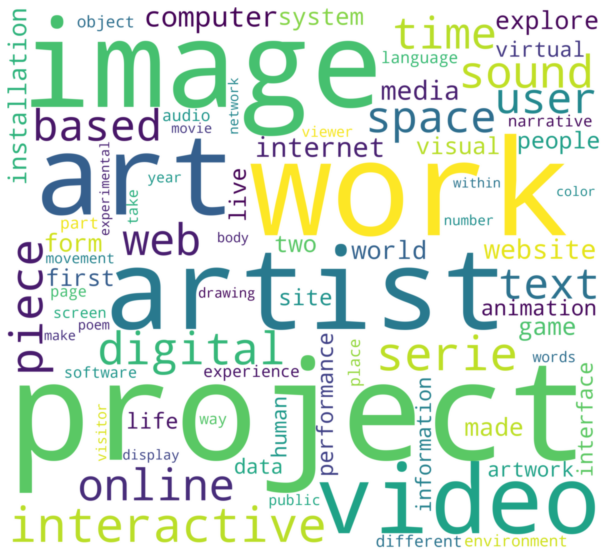

In [16]:
wordcloud = WordCloud(background_color='white', width=2400, height=2200, max_words=75, stopwords=['one', 'using', 'created', 'create', 'new', 'u', 'may', 'word', 'use', 'become', 'like', 'uses']).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='gaussian')
plt.axis("off")
plt.show()

In [35]:
text_2 = moma_arch_cont_text_stop['Text'].to_list()
text_2 = ' '.join(text_2)

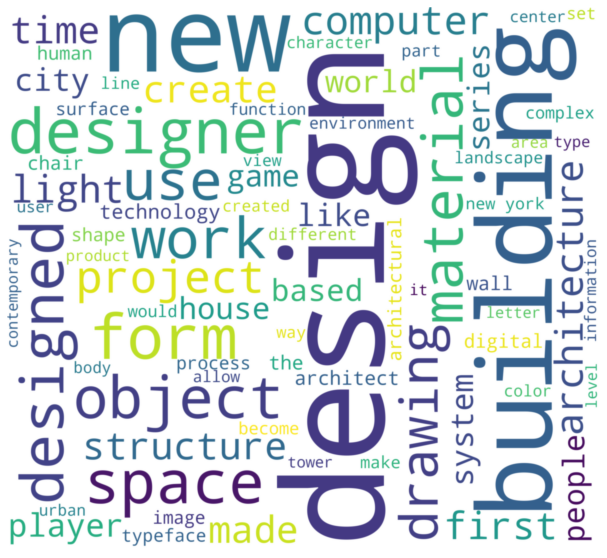

In [37]:
wordcloud_2 = WordCloud(background_color='white', width=2400, height=2200, max_words=75, stopwords=['s', 'used', 'three', 'many', 'using', 'a', 'it']).generate(text_2)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_2, interpolation='gaussian')
plt.axis("off")
plt.show()

In [ ]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(rhizome_txt_stop_kw['Keywords'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h', n=25, size=(1440, 900), title='Rhizome Frequency Distribution of Keywords')
visualizer.fit(docs)
visualizer.show()

In [ ]:
#turn kw into list
rhizome_kw = rhizome_txt_stop_kw.assign(Keywords=rhizome_txt_stop_kw.Keywords.str.split(","))
#split kw lists into single column
rhizome_kw_e = rhizome_kw.Keywords.explode().to_frame().reset_index(drop=True)  
#count kws 
rhizome_kw_e_2 = rhizome_kw_e['Keywords'].value_counts().rename_axis('Keywords').reset_index(name='Count')
rhizome_kw_e_2

In [5]:
fig = px.bar(rhizome_kw_e_2[:25], x='Count', y='Keywords', height=800, color='Count', text_auto=True)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [10]:
rhizome_mediums = rhizome_txt_stop_kw.copy()

In [11]:
rhizome_mediums['Medium'] = pd.Series(dtype='string')

In [20]:
rhizome_mediums.loc[rhizome_mediums['Text'].str.contains('flash')]

,ID,URL,Title,Artist,dateAcquired,dateCreated,Nationality,Gender,Text,Keywords,Medium
8,1110,https://artbase.rhizome.org/wiki/Q3014,youConnect,mark cooley,2004,2003,American,M,youcoect begiing larger attempt deal materiali...,"youcoect, begiing, larger, attempt, deal, mate...",<NA>
20,1146,https://artbase.rhizome.org/wiki/Q4344,X(818),peter nidzgorski,2002,2001,missing,M,x818 video project combines monotony hypnosis ...,"video, project, combines, monotony, hypnosis, ...",<NA>
26,326,https://artbase.rhizome.org/wiki/Q2204,www.hotel-president.de,Hannes Gamper,2001,2001,missing,M,wwwhotelpresidentde presents photos texts webs...,"wwwhotelpresidentde, presents, photos, texts, ...",<NA>
28,222,https://artbase.rhizome.org/wiki/Q3445,www.biencommun.com,David Zerah,2002,2002,missing,M,description wwwbiencommuncomn1 exhibition spac...,"description, exhibition, mother, cell, shown, ...",<NA>
31,135,https://artbase.rhizome.org/wiki/Q3542,WTBA Championship Boxing,C. J. Yeh,2002,2002,Taiwanese,M,wtba championship boxing flash animation depic...,"wtba, championship, boxing, flash, animation, ...",<NA>
...,...,...,...,...,...,...,...,...,...,...,...
2250,767,https://artbase.rhizome.org/wiki/Q3316,"""Your sFace or Mine?""",Reginald Brooks,2004,2004,American,M,perfect geometry like say perfect architecture...,"perfect, geometry, like, say, perfect, archite...",<NA>
2255,28,https://artbase.rhizome.org/wiki/Q1275,"""Because You Asked""",Alan Bigelow,2007,2007,American,M,asked artists digital selfportrait sound text ...,"asked, artists, digital, selfportrait, sound, ...",<NA>
2257,675,https://artbase.rhizome.org/wiki/Q3287,'Button' Element with looped Click sound,Nathan Castle,2004,2000,missing,M,iswas meditation interface web rather old piec...,"iswas, meditation, interface, web, rather, old...",<NA>
2261,1119,https://artbase.rhizome.org/wiki/Q3351,_][s][hut][ters][ of d.funct meat_//,mez breeze,2002,2002,Australian,F,wurkmez breez20 september 2002t art netwurk me...,"wurkmez, september, art, netwurk, mezangelle, ...",<NA>
